# Single layer and Multi-layer Percceptron

### Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import torch
import time
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import networkx as nx


### Load the Dataset

### Model the single hidden layer Perceptron

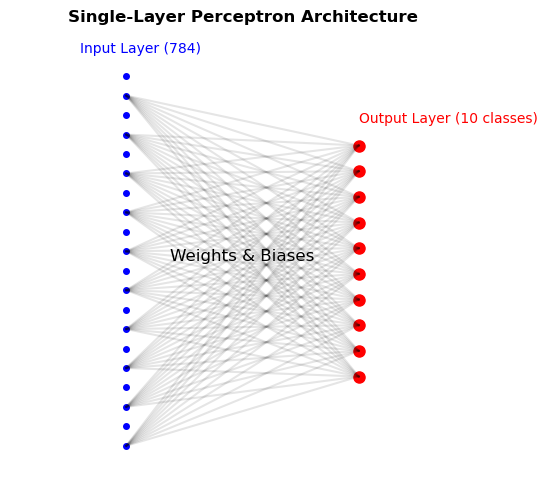

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def draw_perceptron_diagram():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')
    
    # Input neurons (reduced count for visibility)
    num_inputs = 20  # Originally 28x28 = 784, but reduced for clarity
    input_positions = np.linspace(-0.8, 0.8, num_inputs)
    
    for i in input_positions:
        ax.plot(-0.5, i, 'bo', markersize=4)  # Blue input nodes
    
    # Output neurons
    num_outputs = 10
    output_positions = np.linspace(-0.5, 0.5, num_outputs)
    
    for i in output_positions:
        ax.plot(0.5, i, 'ro', markersize=8)  # Red output nodes
    
    # Connecting lines between input and output neurons
    for i in input_positions[::2]:  # Draw lines for every second input node (for clarity)
        for j in output_positions:
            ax.plot([-0.5, 0.5], [i, j], 'k-', alpha=0.1)  # Faint gray lines
    
    # Labels
    ax.text(-0.7, 0.9, 'Input Layer (784)', fontsize=10, color='blue')
    ax.text(0.5, 0.6, 'Output Layer (10 classes)', fontsize=10, color='red')
    ax.text(0, 0, 'Weights & Biases', fontsize=12, color='black', ha='center')
    
    plt.title('Single-Layer Perceptron Architecture', fontsize=12, fontweight='bold')
    plt.show()

# Show perceptron diagram
draw_perceptron_diagram()


In [77]:
import torch
import torch.nn as nn

class SingleHiddenLayerPerceptron(nn.Module):
    def __init__(self, num_features, num_hidden, num_classes):
        super(SingleHiddenLayerPerceptron, self).__init__()

        self.num_classes = num_classes

        # Hidden Layer
        self.weight_1 = nn.Parameter(torch.randn(num_hidden, num_features) * 0.1)
        self.bias_1 = nn.Parameter(torch.zeros(num_hidden))

        # Output Layer
        self.weight_o = nn.Parameter(torch.randn(num_classes, num_hidden) * 0.1)
        self.bias_o = nn.Parameter(torch.zeros(num_classes))

    def forward(self, x):
        # Hidden Layer
        z_1 = torch.mm(x, self.weight_1.t()) + self.bias_1
        a_1 = torch.sigmoid(z_1)

        # Output Layer
        z_2 = torch.mm(a_1, self.weight_o.t()) + self.bias_o
        a_2 = torch.sigmoid(z_2)

        return a_1, a_2

    def backward(self, x, a_1, a_2, y):
        y_onehot = torch.zeros(y.size(0), self.num_classes, dtype=a_2.dtype, device=y.device)
        y_onehot.scatter_(1, y.view(-1, 1).long(), 1)

        # Output Layer Gradients
        dloss_da2 = 2. * (a_2 - y_onehot) / y.size(0)
        da2_dz2 = a_2 * (1. - a_2)  # Sigmoid derivative
        delta_out = dloss_da2 * da2_dz2

        dloss__dw_out = torch.mm(delta_out.t(), a_1)
        dloss__db_out = torch.sum(delta_out, dim=0)

        # Hidden Layer Gradients
        dloss_a1 = torch.mm(delta_out, self.weight_o)
        da1__dz1 = a_1 * (1. - a_1)  # Sigmoid derivative
        dloss_dw1 = torch.mm((dloss_a1 * da1__dz1).t(), x)
        dloss_db1 = torch.sum((dloss_a1 * da1__dz1), dim=0)

        return dloss__dw_out, dloss__db_out, dloss_dw1, dloss_db1

# Example usage
if __name__ == "__main__":
    num_features = 5
    num_hidden = 3
    num_classes = 2

    model = SingleHiddenLayerPerceptron(num_features, num_hidden, num_classes)

    # Example input tensor (batch_size=4, num_features=5)
    x = torch.randn(4, num_features)

    # Example target labels (batch_size=4)
    y = torch.randint(0, num_classes, (4,))

    # Forward pass
    a_1, a_2 = model.forward(x)

    # Backward pass
    gradients = model.backward(x, a_1, a_2, y)

    print("Gradients computed successfully!")


Gradients computed successfully!


### Visualize Perceptron Architecture

In [12]:
# Single layer Perceptron Architecture

In [16]:
# Multi layer Perceptron Architecture

### Training and Evaluation

In [21]:
# Make class labels

In [23]:
# Calculate MSE(Mean Squared Error) 

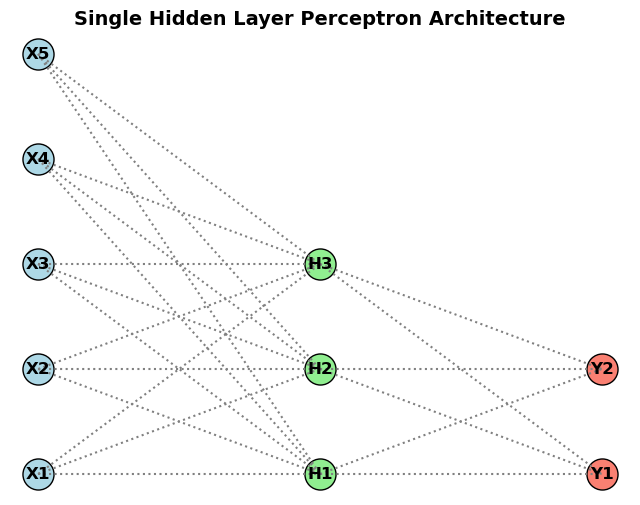

In [79]:
import matplotlib.pyplot as plt

def draw_perceptron(num_features=5, num_hidden=3, num_classes=2):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Define node positions
    input_layer_x = [0] * num_features
    input_layer_y = list(range(num_features))

    hidden_layer_x = [1] * num_hidden
    hidden_layer_y = list(range(num_hidden))

    output_layer_x = [2] * num_classes
    output_layer_y = list(range(num_classes))

    # Draw input layer
    for i in range(num_features):
        ax.scatter(input_layer_x[i], input_layer_y[i], s=500, c='lightblue', edgecolors='black')
        ax.text(input_layer_x[i], input_layer_y[i], f'X{i+1}', ha='center', va='center', fontsize=12, fontweight='bold')

    # Draw hidden layer
    for i in range(num_hidden):
        ax.scatter(hidden_layer_x[i], hidden_layer_y[i], s=500, c='lightgreen', edgecolors='black')
        ax.text(hidden_layer_x[i], hidden_layer_y[i], f'H{i+1}', ha='center', va='center', fontsize=12, fontweight='bold')

    # Draw output layer
    for i in range(num_classes):
        ax.scatter(output_layer_x[i], output_layer_y[i], s=500, c='salmon', edgecolors='black')
        ax.text(output_layer_x[i], output_layer_y[i], f'Y{i+1}', ha='center', va='center', fontsize=12, fontweight='bold')

    # Draw connections (input to hidden)
    for i in range(num_features):
        for j in range(num_hidden):
            ax.plot([input_layer_x[i], hidden_layer_x[j]], [input_layer_y[i], hidden_layer_y[j]], 'gray', linestyle="dotted")

    # Draw connections (hidden to output)
    for i in range(num_hidden):
        for j in range(num_classes):
            ax.plot([hidden_layer_x[i], output_layer_x[j]], [hidden_layer_y[i], output_layer_y[j]], 'gray', linestyle="dotted")

    # Hide axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    
    plt.title("Single Hidden Layer Perceptron Architecture", fontsize=14, fontweight='bold')
    plt.show()

# Run the function
draw_perceptron()


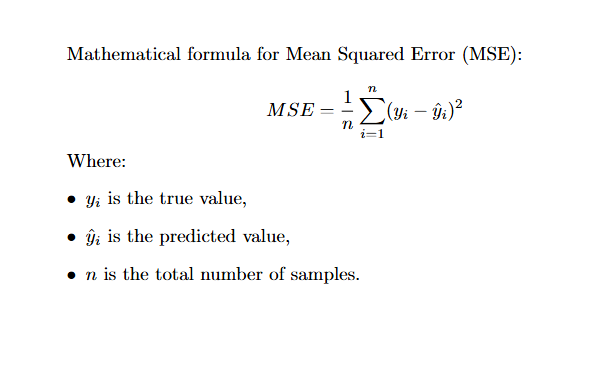

###  Train the Model

In [28]:
# Single layer

In [33]:
# Multi-layer

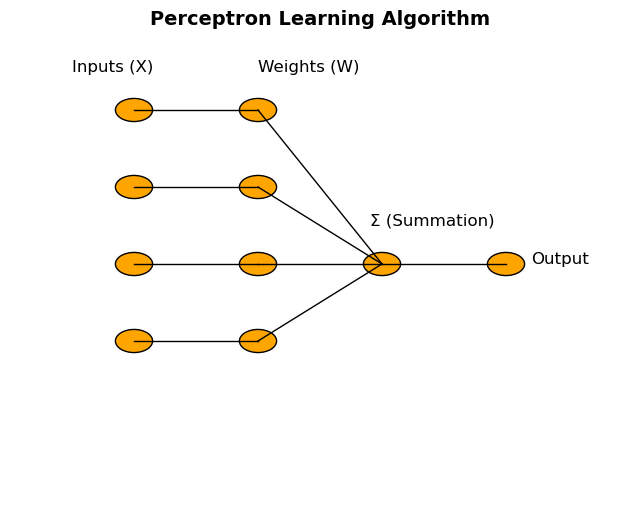

In [66]:
import matplotlib.pyplot as plt
def visualize_perceptron():
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 5)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Define node positions
    input_nodes = [(0, y) for y in range(4, 0, -1)]  # 4 input nodes
    weight_nodes = [(1, y) for y in range(4, 0, -1)]  # 4 weight nodes
    summation_node = [(2, 2)]  # Summation node
    output_node = [(3, 2)]  # Output node

    # Draw nodes
    for node in input_nodes + weight_nodes + summation_node + output_node:
        ax.add_patch(plt.Circle(node, 0.15, color='orange', ec='black'))

    # Draw connections
    for inp, weight in zip(input_nodes, weight_nodes):
        ax.plot([inp[0], weight[0]], [inp[1], weight[1]], 'k-', lw=1)

    for weight in weight_nodes:
        ax.plot([weight[0], summation_node[0][0]], [weight[1], summation_node[0][1]], 'k-', lw=1)

    ax.plot([summation_node[0][0], output_node[0][0]], [summation_node[0][1], output_node[0][1]], 'k-', lw=1)

    # Labels
    ax.text(-0.5, 4.5, 'Inputs (X)', fontsize=12, color='black')
    ax.text(1, 4.5, 'Weights (W)', fontsize=12, color='black')
    ax.text(1.9, 2.5, 'Σ (Summation)', fontsize=12, color='black')
    ax.text(3.2, 2, 'Output', fontsize=12, color='black')

    plt.title('Perceptron Learning Algorithm', fontsize=14, fontweight='bold')
    plt.show()

# Call the function
visualize_perceptron()


In [57]:
# Make class labels

In [39]:
# Calculate MSE(Mean Squared Error) 

### Training and Evaluation

In [44]:
# Formula for Mean Squared Error (MSE)

from IPython.display import display, Math
display(Math(r"MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2"))


<IPython.core.display.Math object>

### Train the Model (for both single and multi-layer)

In [47]:
# Initialize the model with a single hidden layer perceptron
# - num_features = 28*28 (size of flattened image input)
# - num_hidden = 50 (number of hidden units in the hidden layer)
# - num_classes = 10 (output classes for digits 0-9)

In [50]:
# Train the model using the training dataset
# - model: the initialized neural network model
# - train_loader: DataLoader containing the training dataset
# - num_epochs: number of epochs (iterations over the entire dataset)
# - learning_rate: step size for updating model weights during training

In [53]:
# Plot the minibatch cost over training iterations

In [ ]:
# Plot the epoch-wise cost over training

In [ ]:
# Compute Train and Test Accuracy

In [ ]:
# For Single layer

In [ ]:
# For Multi-layer

In [ ]:
# Create a figure and a set of 4 subplots arranged in one row 

In [ ]:
# # 1 row, 4 columns (to display 4 images)

In [ ]:
# Print the predicted class labels

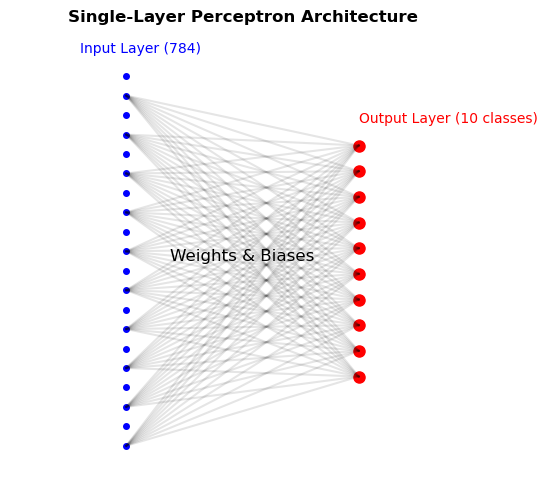

In [85]:
import numpy as np
import matplotlib.pyplot as plt

def draw_perceptron_diagram():
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.axis('off')
    
    # Input neurons (reduced count for visibility)
    num_inputs = 20  # Originally 28x28 = 784, but reduced for clarity
    input_positions = np.linspace(-0.8, 0.8, num_inputs)
    
    for i in input_positions:
        ax.plot(-0.5, i, 'bo', markersize=4)  # Blue input nodes
    
    # Output neurons
    num_outputs = 10
    output_positions = np.linspace(-0.5, 0.5, num_outputs)
    
    for i in output_positions:
        ax.plot(0.5, i, 'ro', markersize=8)  # Red output nodes
    
    # Connecting lines between input and output neurons
    for i in input_positions[::2]:  # Draw lines for every second input node (for clarity)
        for j in output_positions:
            ax.plot([-0.5, 0.5], [i, j], 'k-', alpha=0.1)  # Faint gray lines
    
    # Labels
    ax.text(-0.7, 0.9, 'Input Layer (784)', fontsize=10, color='blue')
    ax.text(0.5, 0.6, 'Output Layer (10 classes)', fontsize=10, color='red')
    ax.text(0, 0, 'Weights & Biases', fontsize=12, color='black', ha='center')
    
    plt.title('Single-Layer Perceptron Architecture', fontsize=12, fontweight='bold')
    plt.show()

# Show perceptron diagram
draw_perceptron_diagram()
